Infectishield ML App


Importing Libraries and Reading the Data

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\asaa9\OneDrive\Desktop\InfectiShield\Dataset.csv')

# Data was obtained from https://www.cdc.gov/mmwr/preview/mmwrhtml/mm6107a1.htm?s_cid=mm6107a1_e 
# Influenza Vaccination Coverage Among Pregnant Women — 29 States and New York City, 2009–10 Season

In [3]:
#Exploratory Data Analysis 

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   State        28 non-null     object 
 1   Seasonal n   28 non-null     int64  
 2   Seasonal %   28 non-null     object 
 3   Longitude    28 non-null     float64
 4   Latitude     28 non-null     float64
 5   2009 H1N1 n  28 non-null     int64  
 6   2009 H1N1 %  28 non-null     object 
 7   Longitude.1  28 non-null     float64
 8   Latitude.1   28 non-null     float64
dtypes: float64(4), int64(2), object(3)
memory usage: 2.1+ KB


In [4]:
df.head()

,State,Seasonal n,Seasonal %,Longitude,Latitude,2009 H1N1 n,2009 H1N1 %,Longitude.1,Latitude.1
0,Colorado,1317,52.80%,-106.133611,38.843841,1316,44.20%,-106.133611,38.843841
1,Florida,927,26.10%,-81.928961,28.932040,924,28.70%,-81.928961,28.932040
2,Georgia,614,29.90%,-83.627580,32.839681,617,28.40%,-83.627580,32.839681
3,Hawaii,974,50.30%,-157.857749,21.304850,987,44.90%,-157.857749,21.304850
4,Illinois,1071,47.10%,-88.997710,40.485010,1079,37.70%,-88.997710,40.485010


In [5]:
# Creating a new Data Frame with Seasonal Virus Data Only by dropping the last 4 columns 
# App is created for predicting Seasonal Flu Risk


# Create a new DataFrame by dropping columns
df = df.drop(df.columns[5:], axis=1)

# Displaying the new DataFrame
print(df.head())


      State  Seasonal n Seasonal %   Longitude   Latitude
0  Colorado        1317     52.80% -106.133611  38.843841
1   Florida         927     26.10%  -81.928961  28.932040
2   Georgia         614     29.90%  -83.627580  32.839681
3    Hawaii         974     50.30% -157.857749  21.304850
4  Illinois        1071     47.10%  -88.997710  40.485010


In [6]:
#Displaying the Top 5 columns of the new Data Frame 

df.head()

,State,Seasonal n,Seasonal %,Longitude,Latitude
0,Colorado,1317,52.80%,-106.133611,38.843841
1,Florida,927,26.10%,-81.928961,28.932040
2,Georgia,614,29.90%,-83.627580,32.839681
3,Hawaii,974,50.30%,-157.857749,21.304850
4,Illinois,1071,47.10%,-88.997710,40.485010


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State       28 non-null     object 
 1   Seasonal n  28 non-null     int64  
 2   Seasonal %  28 non-null     object 
 3   Longitude   28 non-null     float64
 4   Latitude    28 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ KB


CREATING INFECTISHIELD ML APP

1. Defining Risk Parameters based on Vaccination Rate (Seasonal %)
2. Training a Random Forest Model to Predict Risk Classes (High, Moderate and Low)
3. Assigning Weights to Flu Symptoms
4. Creating a Matrix that assigns a Final Risk Prediction to the User based on the Model and Symptoms 
5. Visualization of Final Risk Prediction 

#1. Defining Risk Parameters

In [8]:
# Defining Risk Parameters and Adding Risk Level to make a New DataFrame 

def get_risk(rate):
    rate = float(rate.rstrip('%')) / 100  # Converts Seasonal % values to float
    if rate > 0.7:
        return 'Low'
    elif rate > 0.4:
        return 'Moderate'
    else:
        return 'High'


df['Risk'] = df['Seasonal %'].apply(get_risk)  # Apply the get_risk function to the 'Seasonal %' column and create a new 'Risk' column




#2. Training a Random Forest Model to Predict Risk Classes (High, Moderate and Low)


In [11]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import LabelEncoder

In [12]:
# Extracting Features for the Model

le = LabelEncoder()
le.fit(df['Risk'])
X = df[['Longitude','Latitude']]
y = df['Risk']

In [13]:
# K-Fold Cross Validation and RF Model

kf = KFold(n_splits=10, shuffle=True, random_state=42)


rf = RandomForestClassifier(n_estimators=1000) 

scores = []
for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  
  # Fit the model
  rf.fit(X_train, y_train)
  
  score = rf.score(X_test, y_test)
  scores.append(score)  
  
  Y_pred = rf.predict(X_test)
  
  
  
rf.fit(X, y)
  
 
print("Average CV Accuracy: {:.3f}".format(sum(scores)/len(scores)))




# Collecting new data points
new_lats = []
new_lons = []


print("Enter location coordinates:")
lat = float(input("Latitude: "))
lon = float(input("Longitude: "))


  
  # Add to lists
new_lats.append(lat)
new_lons.append(lon)

# Create DataFrame
test_df = pd.DataFrame({'Longitude': new_lons, 'Latitude': new_lats})

# Extract features 
X_new = test_df[['Longitude', 'Latitude']]

# Make predictions
Y_new = rf.predict(X_new) 

print(f"Prediction: {Y_new[0]}")

# ML model prediction
if Y_new[0] == 'High':
    ml_risk = 3
elif Y_new[0] == 'Moderate':
    ml_risk = 2
else:
    ml_risk = 1

Average CV Accuracy: 0.833
Enter location coordinates:
Prediction: Moderate


#3. Assigning Weights to Flu Symptoms

Symptoms Weight was distributed subjectively based on research

User Input: Y = Yes, N = No.

In [14]:
possible_symptoms = ['Fever', 'Cough', 'Sore throat', 'Body ache',  
                     'Headache', 'Fatigue', 'Vomiting', 'Diarrhea', 
                     'Runny nose', 'Eye pain', 'Sneezing', 'Dizziness', 'Chills']


# Symptom weights 
symptom_weights = {'Fever': 0.12, 'Cough': 0.12, 'Sore throat': 0.11, 
                   'Body aches': 0.11, 'Headache': 0.08, 'Fatigue': 0.11, 
                   'Vomiting': 0.04,  'Diarrhea': 0.05, 'Runny nose': 0.11, 
                   'Eye pain': 0.01, 'Sneezing': 0.03, 'Dizziness': 0.01, 'Chills':0.1}

print("Select your symptoms:")
patient_symptoms = []
for i in possible_symptoms:
  response = input(f"{i} (y/n)? ")
  if response.lower() == 'y':
    patient_symptoms.append(i)


# Calculate symptom score
symptom_score = 0
for i in patient_symptoms:
  if i in symptom_weights:
    symptom_score += symptom_weights[i]


if symptom_score >= 0.7:
    symptom_risk = 3
elif symptom_score >= 0.4:  
    symptom_risk = 2
else:
    symptom_risk = 1


# Print the prediction based on the symptom risk level
if symptom_risk == 3:
    print("Prediction: High Risk")
elif symptom_risk == 2:
    print("Prediction: Moderate Risk")
elif symptom_risk == 1:
    print("Prediction: Low Risk")
else:
    print("Prediction: Unknown Risk")


Select your symptoms:
Prediction: Moderate Risk


#4. Final Risk Prediction


In [15]:
# Create final risk prediction with a risk matrix
risk_matrix = {
    (1,1): 'Low',
    (1,2): 'Low',
    (1,3): 'Moderate',
    (2,1): 'Low',
    (2,2): 'Moderate',
    (2,3): 'High',
    (3,1): 'Moderate',
    (3,2): 'High',
    (3,3): 'High'
}

# Combine risks
combined_risk = risk_matrix[(ml_risk, symptom_risk)]

print(f"Final Risk Prediction: {combined_risk}")

Final Risk Prediction: Moderate


#5. Visualization of Final Risk Prediction 

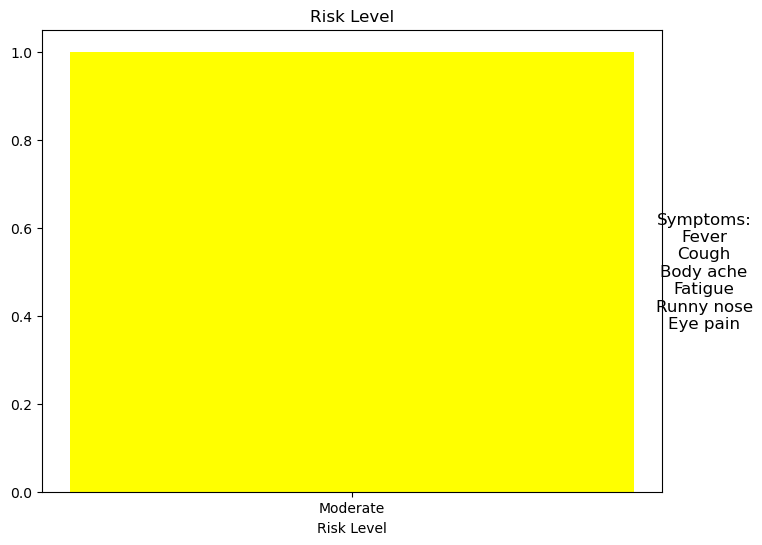

In [16]:
import matplotlib.pyplot as plt

# Defining the symptom input by the user
user_symptoms = patient_symptoms

# Create a dictionary to map risk levels to colors and labels
risk_colors = {
    'Low': 'green',
    'Moderate': 'yellow',
    'High': 'red'
}


risk_color = risk_colors[combined_risk] # Get the color and label based on the combined risk level


plt.figure(figsize=(8, 6))
plt.bar([combined_risk], [1], color=risk_color)
plt.title('Risk Level')
plt.xlabel('Risk Level') # Creates a bar chart visualization


if user_symptoms:
    symptom_text = '\n'.join(user_symptoms)
    plt.text(0.5, 0.5, f'Symptoms:\n{symptom_text}', ha='center', va='center', fontsize=12)  # Add symptoms as text to the chart


plt.show() # Show the visualization